<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Reinforcement%20Learning/Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

## Theory

Used in Robotics, Solving complex games, Automated driving

It's a science of decision-making.

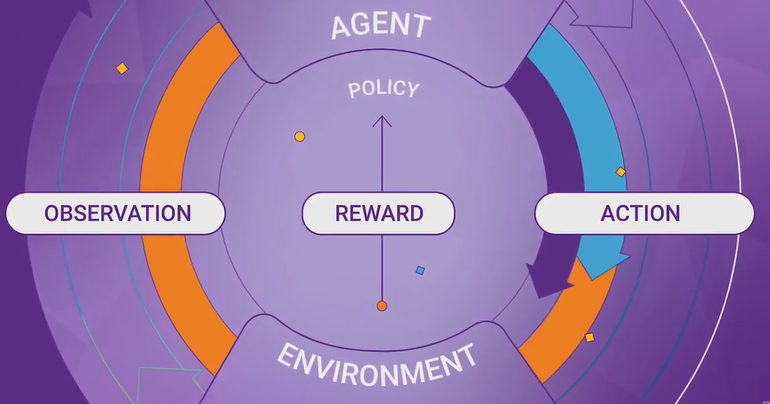

### Upper Confidence Bound (UCB)

#### **The Multi-Armed Bandit Problem**

Exploration: Exploring different machines

Exploitations

Regret: Losing cost in exploration

Goal: Finding Optimal machine

Example: Out of 5 or 6 advertisements, find the most optimal one

#### Steps of UCB

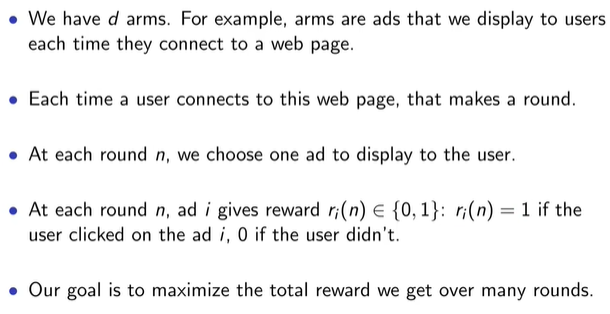

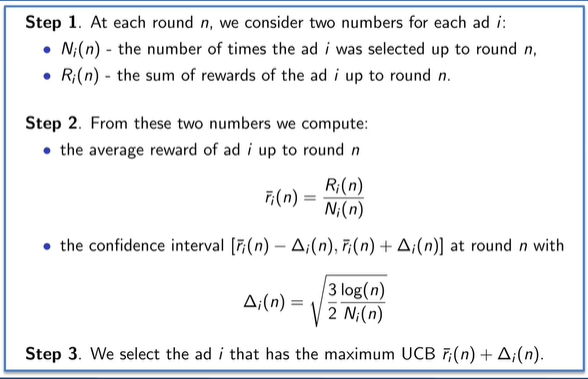

#### Goal

Here, we need to find which advertisement is attracted to most of the users(which advertisement has the highest click-through-rate), in minimum rounds(users), with respect to certain cost associated by each click of the user.

Also, each advertisement shown to a user has a fixed convergence rate. That is, it converts a fixed amount of users after some time.

## Implementation

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

Here, the dataset is a ***simulation*** of the people who will click on an advertisement shown to them

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing UCB

In [ ]:
import math
N = 10000 # Number of users(rounds)
# We can change value of N, and then visualize the results

d = 10 # Number of ads
ads_selected = [] # List of 10000 users(rounds), with nth value as the ad clicked at nth round with max UCB
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_rewards = 0

for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    if(numbers_of_selections[i] != 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt((3/2 * math.log(n + 1)) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_rewards += reward
print(ads_selected)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

### Visualising the results

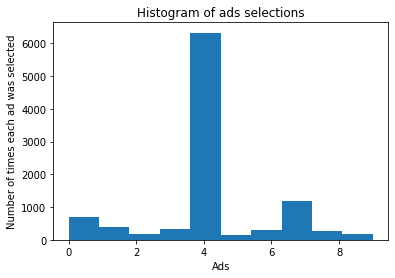

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
# Here, from just approx 6500 rounds, we can say that
# Ad number 5 is most selected by the users (0 indexing)